# MSc in Data Science 
# Machine Learning 
# Academic Year: 2017-2018

## White wines dataset

In this exercise, we are provided with two datasets, about red and white wine quality to work with. The scope of this exercise is to apply some machine learning algorithms to the provided data, so as to learn a set of models.

Before proceeding with the above application, we have to take a look at the provided datasets, so as to gain knowledge about what these datasets are about, the features of which they are composed and some other characteristics that will be useful for the inferences we are going to conclude. 

In [1]:
import sys
import re
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz


We load the data from the appropriate url and print the first and the last ten instances, so as to look at the rows and columns and the values of the "cells". We observe here that there are 12 features of which the 12th is the quality, thus the target feature. We also notice that the values are not scaled, which means that there are values that have a large discrepancy between them. 

In [2]:
balance_data = pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ";", header = 0)
balance_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [3]:
balance_data.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4888,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5
4889,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6
4890,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6
4891,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
4892,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5
4893,6.2,0.210,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.240,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.290,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.210,0.38,0.80,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


We print the shape of the data (vector) to know with how many instances we are working with.

In [4]:
balance_data.shape

(4898, 12)

In [5]:
balance_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Then we want to know how many wines belong to each target value, thus to each quality. The goal is to know if there are some classes that have many more wines than others. This will probably create a problem in the application of some machine learning algorithms. Here, we observe that the larger amount of wines belong to class 6. A smaller amount them belong to classes 5 and 8 and all the other classes have significantly smaller amounts, with classes 1, 2, and 10 having zero wines belonging to them. This is a sign that there might be a problem if we want to apply algorithms, that require tha data to be evenly distributed.

In [6]:
balance_data.groupby('quality').size()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

The following step is to display some descriptive statistics, such as the minimum/maximum values, the average and the standard deviation of the features.

In [7]:
balance_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


The correlation between the different features is very important, because there are algorithms that have as a bias the independence of the variables. We display a matrix and a heatmap that both show if there is such correlation. In the matrix, the closer the value between two features is to 1 the higher the correlation. The same applies to the heatmap, except for each value is assigned to a color, making it easier and faster to discover the correlations. Here, we have high correlation between the features "density" and "residual sugar", so we have to consider this and decide whether we are going to remove one of these features or both and then procceed. Within this exercise, we will not remove any of them. 

In [8]:
balance_data.corr(method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


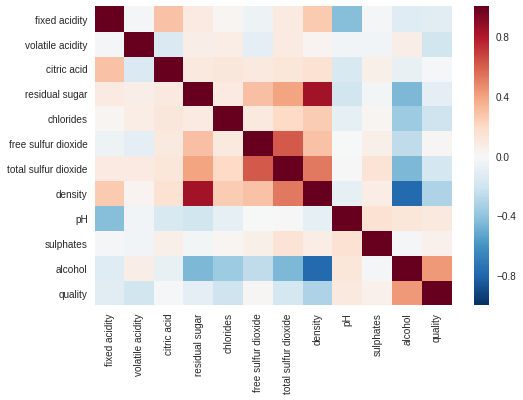

In [9]:
correlations = balance_data.corr()
sns.heatmap(correlations)
plt.show()

The next step is to identify if there are any outliers in the values of the features, something that could cause the algorithms to not behave as intended. If there are outliers, we have to consider removing them, BUT we have to be very careful and understand if the provided outlier is a value that is wrong or just a value that may appear in real life data of this type and is rather rare. Here, the feature "chlorides" seem to contain one or many outliers, but as we don't have deep knowledge of the characteristics of the features, we will not take action against them.

In [10]:
balance_data.skew()

fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64

In the next six cells we display some plots that provide us with useful information about the dataset, such as histograms and density plots, which show us unobservable underlying probability density functions and box plots, that show us groups of the data through their quartiles. 

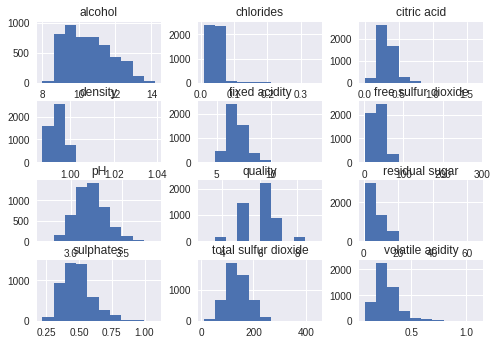

In [11]:
balance_data.hist()
plt.show()

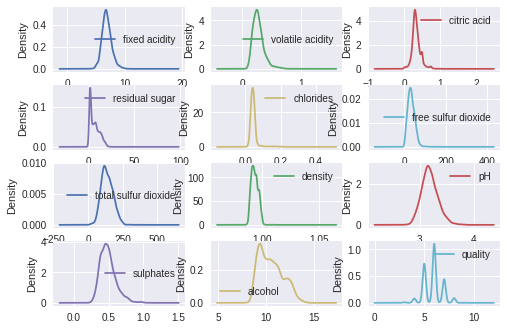

In [12]:
balance_data.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

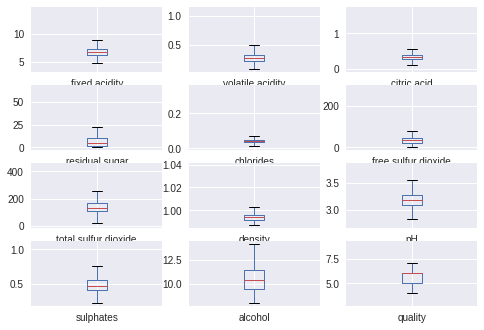

In [13]:
balance_data.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False)
plt.show()

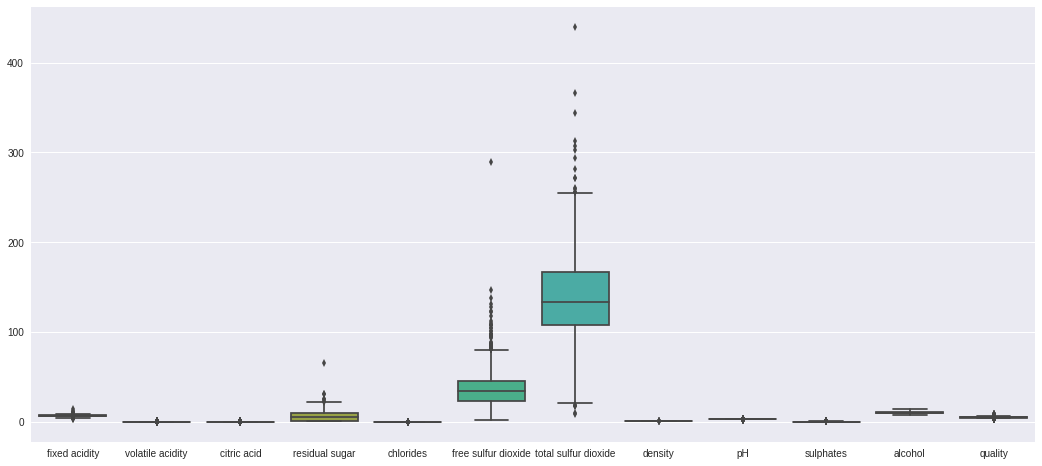

In [14]:
f = plt.figure(figsize=(18,8))
sns.boxplot(data=balance_data)
plt.show()

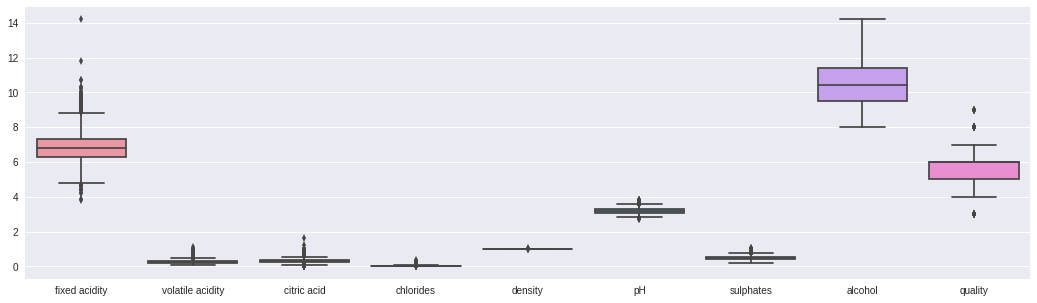

In [15]:
stats_balancedata = balance_data.drop(['total sulfur dioxide', 'free sulfur dioxide', 'residual sugar'], axis=1)
plt.figure(figsize=(18,5))
sns.boxplot(data=stats_balancedata)
plt.show()

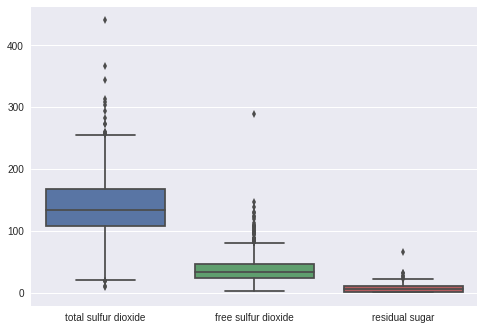

In [16]:
sulfur_balancedata = balance_data[['total sulfur dioxide', 'free sulfur dioxide', 'residual sugar']]
sulfur_balancedata.head()
sns.boxplot(data=sulfur_balancedata)
plt.show()